In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [5]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

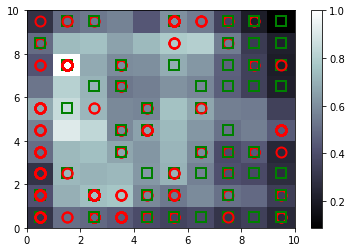

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [8]:
mappings = som.win_map(X)

In [9]:
print(type(mappings[(0,7)]))
#print(mappings[(6,4)])
print(np.array(mappings[(0,7)]).shape)

<class 'list'>
(3, 15)


In [10]:
#print(mappings[(4,3)])
print(np.array(mappings[(3,1)]).shape)

(4, 15)


In [11]:
# Finding the frauds
#mappings = som.win_map(X)
print(type(mappings))
#print(mappings)


<class 'collections.defaultdict'>


In [12]:
frauds = np.concatenate((mappings[(0,7)], mappings[(3,1)]), axis = 0)
print(frauds)

[[3.96069339e-02 0.00000000e+00 1.65413534e-01 4.88035714e-01
  5.00000000e-01 7.69230769e-01 8.75000000e-01 5.26315789e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e-01 1.40000000e-01 1.00000000e-05]
 [5.16367743e-01 0.00000000e+00 1.91729323e-01 9.67857143e-02
  0.00000000e+00 5.38461538e-01 3.75000000e-01 2.98245614e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.00000000e-02 0.00000000e+00]
 [3.43356198e-01 0.00000000e+00 8.38345865e-01 2.14285714e-01
  5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.56039947e-01 1.00000000e+00 7.63909774e-02 0.00000000e+00
  5.00000000e-01 7.69230769e-01 3.75000000e-01 2.33333333e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e-01 8.00000000e-02 1.00000000e-05]
 [6.78763780e-01 1.00000000e+00 1.37894737e-01 6.07142857e-03
  

In [13]:
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5575605e+07 0.0000000e+00 2.4750000e+01 1.3665000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 2.0000000e+00]
 [1.5694666e+07 0.0000000e+00 2.6500000e+01 2.7100000e+00 1.0000000e+00
  8.0000000e+00 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 8.0000000e+01 1.0000000e+00]
 [1.5651460e+07 0.0000000e+00 6.9500000e+01 6.0000000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5779492e+07 1.0000000e+00 1.8830000e+01 0.0000000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 6.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 2.0000000e+00]
 [1.5735221e+07 1.0000000e+00 2.2920000e+01 1.7000000e-01 2.0000000e+00
  7.0000000e+00 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.

In [14]:
print('{:f}'.format(frauds[0][0]))

15575605.000000


In [ ]:
#frauds = frauds.tolist()

In [37]:
#print(type(frauds))

print(type(frauds[0]))
print(type(frauds))


'''for i in frauds :
    frauds[i].tolist()'''

v = np.array(frauds).shape
print(v)

for i in  range(0,v[0]) :
    for j in range(0,v[1]) :
        k = '{:f}'.format(float(frauds[i][j]))
        frauds[i][j] = k


        
print(frauds)


<class 'list'>
<class 'list'>
(7, 15)
[['15575605.000000', '0.000000', '24.750000', '13.665000', '2.000000', '11.000000', '8.000000', '1.500000', '0.000000', '0.000000', '0.000000', '0.000000', '2.000000', '280.000000', '2.000000'], ['15694666.000000', '0.000000', '26.500000', '2.710000', '1.000000', '8.000000', '4.000000', '0.085000', '0.000000', '0.000000', '0.000000', '0.000000', '1.000000', '80.000000', '1.000000'], ['15651460.000000', '0.000000', '69.500000', '6.000000', '2.000000', '1.000000', '1.000000', '0.000000', '0.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000', '1.000000'], ['15779492.000000', '1.000000', '18.830000', '0.000000', '2.000000', '11.000000', '4.000000', '0.665000', '0.000000', '0.000000', '0.000000', '0.000000', '2.000000', '160.000000', '2.000000'], ['15735221.000000', '1.000000', '22.920000', '0.170000', '2.000000', '7.000000', '4.000000', '0.085000', '0.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000', '1.000000'], ['1